# Aprendiendo embeddings y usando pre-entrenados

En esta notebook, experimentaremos con embeddings aprendidos mediante algoritmos clásicos como Word2Vec, utilizando para ello las facilidades provistas por [Gensim](https://radimrehurek.com/gensim/).  Los algoritmos de entrenamiento provistos en este paquete fueron "migrados" desde la [implementación original de Word2Vec de Google](https://arxiv.org/pdf/1301.3781.pdf) y extendidos con algunas funcionalidades adicionales. La idea es identificar las principales herramientas que puede ser útiles para **entrenar** nuestros **propios embeddings**, **cargar** embeddings **pre-entrenados** (usando Word2vec o Glove), **verificar** ciertos **aspectos semánticos** capturados por los embeddings y **visualizar** embeddings en un espacio bi-dimensional.

El plan sugerido incluye:
- Entrenar los embeddings de las palabras utilizando Word2Vec en un ejemplo de juguete
- Cargar embeddings pre-entrenados aprendidos con Glove, verificar relaciones semánticas interesantes de los embeddings y visualizarlos utilizano PCA y t-SNE
- Entrenar embeddings con Word2Vec utilizando un data set más realista que el del primer punto, y analizar algunos embeddings aprendidos
- Cargar embeddings pre-entrenados aprendidos con Word2Vec (opcional por razones de tiempo de carga)



## 1. Entrenando embeddings con Word2Vec: un ejemplo de juguete

Este punto, sólo aspira a familiarizarnos con los parámetros más comunes de la clase [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html) provista por gensim para trabajar con un modelo Word2Vec. Para aprender los word embeddings desde un texto se requiere disponer del texto (usualmente cargado desde un corpus) organizado en sentencias que son provistas al constructror de una nueva instancia de `Word2Vec()`. Por ejemplo, si en lugar de cargar las sentencias las escribimos directamente como una lista de las listas de palabras (tokens) que componen las sentencias, obtendríamos algo por el estilo:   

In [1]:
from gensim.models import Word2Vec
# definir los datos de entrenamiento
sentencias = [['esta', 'es', 'la', 'primer', 'sentencia', 'para', 'word2vec'],
            ['esta', 'es', 'la', 'segunda', 'sentencia'],
            ['y', 'esta', 'es', 'otra','sentencia'],
            ['una', 'sentencia', 'mas'],
            ['y', 'la', 'sentencia', 'final']]
# entrenar el modelo
modelo = Word2Vec(sentencias, min_count=1)
# resumir el modelo obtenido
print(modelo)
# esumir el vocabulario
palabras = list(modelo.wv.vocab)
print(palabras)
# acceder el vector correspndiente a una palabra
print(modelo['sentencia'])
# guardar el modelo
modelo.save('modelo.bin')
# cargar el modelo
nuevo_modelo = Word2Vec.load('modelo.bin')
print(nuevo_modelo)

Word2Vec(vocab=13, size=100, alpha=0.025)
['esta', 'es', 'la', 'primer', 'sentencia', 'para', 'word2vec', 'segunda', 'y', 'otra', 'una', 'mas', 'final']
[ 4.02055727e-03 -8.36269755e-05  3.02475761e-03 -4.26729256e-03
 -4.42220550e-03  4.27202275e-03  2.14335625e-03 -4.00383538e-03
 -5.39315748e-04  1.21166544e-04  7.44483783e-04  3.97852762e-03
  2.96886079e-03 -9.86575615e-04 -5.01798466e-04 -3.35541368e-03
  6.48554356e-04 -4.96662408e-03 -3.16066504e-03 -4.14866488e-03
  2.86389812e-04 -3.56807210e-03  1.47908553e-03  2.36642896e-03
 -1.69761770e-03 -9.44964588e-04  3.51050100e-03 -3.80441896e-03
  2.57798191e-03 -1.95438974e-03  4.96954005e-03  8.28363292e-04
 -6.22460269e-04  2.54951883e-03  4.26913751e-03 -4.69223317e-03
 -4.20797290e-03 -4.22657887e-03 -8.88292911e-04  8.44901777e-04
  3.39894934e-04 -3.27231595e-03 -2.23149802e-03  2.28213007e-03
 -2.81745498e-03 -3.98423010e-03 -4.15489823e-03  7.23948004e-04
  1.36968377e-03 -2.07984983e-03 -4.00325807e-04 -4.27275058e-03
 -

C:\Users\Marcelo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()
C:\Users\Marcelo\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
C:\Users\Marcelo\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Se puede observar, que cada oración debe ser "tokenizada", es decir, dividida en palabras y preparada de algún modo, por ejemplo, usando un prefiltrado y quizás convertida a mayúsculas o minúscula como sea preferido.

Las oraciones pueden ser un texto cargado en la memoria, u obtenidas con un iterador que lo carga  progresivamente, requerido para corpus muy grandes de texto.

Además de las sentencias, hay varios parámetros en este constructor, siendo los siguientes los más comunes de especificar:


### `size`

`size`: (100 por defecto) El número de dimensiones de los embeddings, es decir, la longitud de los vectores densos utilizados para representar cada "token" o palabra. Si los datos son limitados, el tamaño debería ser un valor mucho menor. Si tiene muchos datos, es bueno experimentar con varios tamaños. Valores entre 100-150 usualmente han funcionado bien.

### `window`

`window`: (5 por defecto) La distancia máxima entre la palabra objetivo y las palabras vecinas (del contexto) de la palabra objetivo. 

### `min_count`

`min_count`: (5 por defecto) Mínima frecuencia que debe cumplir una palabra para ser tomada en cuenta en el entrenamiento del modelo; las palabras con una ocurrencia menor a la especificada en este parámetro serán ignoradas.

### `workers`

`workers`: (5 por defecto) Número de "threads" a usarse durante el entrenamiento

### `sg`

`sg`: (0 (CBOW) por defecto) El algoritmo de entrenamiento utilizado para aprender los embeddings, ya sea CBOW (0) o skip-gram (1).

Los valores por defecto son a menudo lo suficientemente buenos cuando recién se comienza. Si se tiene muchos núcleos, como en la mayoría de las computadoras modernas, se recomienda aumentar los `workers` al número de núcleos disponibles (por ejemplo, 8).

Una vez que se entrena el modelo, se puede acceder a él mediante el atributo `"wv"`,  que es el modelo de vector de palabra real  sobre el que se pueden realizar consultas, como por ejemplo el vocabulario (`vocab`), o sea, el número de palabras **distintas** que se encontraron en las sentencias.

Una vez creado el modelo, puede ser proyectado a dos dimensiones con un método como el de análisis de componentes principales (PCA por sus siglas en inglés) y visualizado para observar la cercanía de los vectores de las palabras:  

C:\Users\Marcelo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


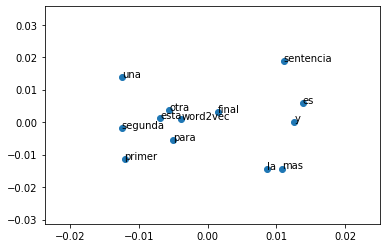

In [2]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# fit a 2d PCA model to the vectors
X = modelo[modelo.wv.vocab]
pca = PCA(n_components=2)
resultado = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(resultado[:, 0], resultado[:, 1])
palabras = list(modelo.wv.vocab)
for i, pal in enumerate(palabras):
    pyplot.annotate(pal, xy=(resultado[i, 0], resultado[i, 1]))
pyplot.show()

## 2. Cargando y evaluando embeddings pre-entrenados con Glove de Stanford

Investigadores de PLN de Stanford también han desarrollado su propio algoritmo de embedding de palabras como word2vec llamado **Global Vectors for Word Representation** abreviado [Glove](https://nlp.stanford.edu/projects/glove/).

Si bien no entraremos en detalles sobre las diferencias entre word2vec y GloVe aquí, los profesionales de PLN suelen preferir GloVe en este momento en función de los resultados obtenidos. Al igual que para word2vec, los desarrolladores de GloVe también proporcionan vectores de palabras previamente entrenados, que pueden ser cargados fácilmente con gensim.

El primer paso es convertir el formato de archivo GloVe al formato de archivo word2vec. La única diferencia es la adición de una pequeña línea de encabezado que se puede realizar llamando a la función `glove2word2vec()`. Una vez convertido, el archivo se puede cargar como cualquier archivo de embeddings word2vec (ver al final de la notebook).

Por ejemplo, se puede descargar el modelo GloVe pre-entrenado más pequeño desde el [sitio web de GloVe](https://nlp.stanford.edu/projects/glove/). Es un archivo zip de 822 megabytes con 4 modelos diferentes (vectores de 50, 100, 200 y 300 dimensiones) entrenados en datos de Wikipedia con 6 mil millones de tokens y un vocabulario de 400.000 palabras.

El enlace de descarga directa está aquí:

- [glove.6B.zip](http://nlp.stanford.edu/data/glove.6B.zip)

Al trabajar con la versión de 100 dimensiones del modelo, podemos convertir el archivo al formato word2vec de la siguiente manera:

In [3]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

C:\Users\Marcelo\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(400000, 100)

Se tiene ahora tiene una copia del modelo GloVe en formato word2vec con el nombre de archivo `glove.6B.100d.txt.word2vec`.

Podemos ahora cargarlo y realizar distintas consultas con los embeddings utilizando el método `most_similar()`, como aquella que me permite calcular: **(king - man) + woman = ?**. Distintas variantes del uso de este método se ven a continuación.

In [4]:
from gensim.models import KeyedVectors
# Cargar el modelo GloVe de Stanford con 100 dimensiones
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calcular: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]


In [5]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.9272854328155518),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875634074211121),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930225372314),
 ('kerry', 0.7472623586654663)]

In [6]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.629442036151886),
 ('papaya', 0.6246591210365295)]

In [7]:
model.most_similar(negative='banana')

[('keyrates', 0.7173939347267151),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720293998718),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434808731079),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905654072761536),
 ('maurilio', 0.6865653395652771)]

In [8]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [9]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [10]:
analogy('japan', 'japanese', 'australia')

'australian'

In [11]:
analogy('australia', 'beer', 'france')

'champagne'

In [12]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [13]:
analogy('tall', 'tallest', 'long')

'longest'

In [14]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [15]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


C:\Users\Marcelo\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:876: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [16]:
print(model.doesnt_match("breakfast money dinner lunch".split()))

money


In [17]:
print(model.doesnt_match("apple banana orange car".split()))

car


In [18]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


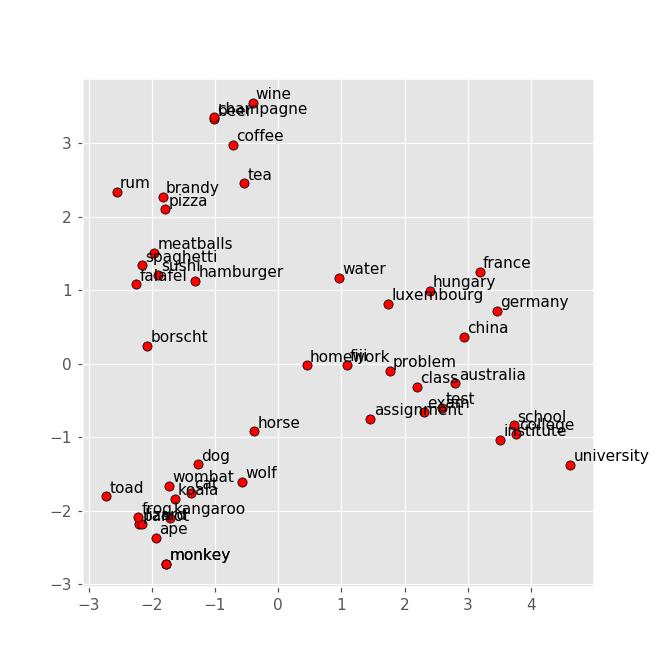

In [19]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

## 3. Entrenando embeddings con Word2Vec sobre un dataset real

Realizaremos ahora el mismo ejercicio de entrenamiento de embeddings con word2vec del punto 1 pero trabajando ahora sobre un dataset real que nos permitira aprender embeddings con más información semántica que con las 5 sentencias simples que usamos alli. Para ello, empezaremos primero con algunos `imports` e inicializaciones.

In [20]:
# imports necesitados y seteo del logging
import gzip
import gensim 
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

### Dataset
El secreto para que Word2Vec realmente funcione es tener **muchos datos** de texto. En este caso, utilizaremos textos del conjunto de datos [OpinRank](http://kavita-ganesan.com/entity-ranking-data/). Este corpus tiene revisiones completas de usuarios de automóviles y hoteles. Su autora, ha concatenado específicamente todas las reseñas de hoteles en un archivo grande que tiene unos 97 MB comprimidos y 229 MB sin comprimir. Usaremos en este caso el archivo comprimido. Cada línea en este archivo representa una reseña de hotel y se puede descargar el conjunto de datos OpinRank directamente desde [aquí](https://github.com/kavgan/OpinRank/blob/master/OpinRankDatasetWithJudgments.zip).

Para evitar confusiones, si bien el tutorial de word2vec de gensim dice que debe pasarle una secuencia de oraciones como entrada, siempre se puede pasar una revisión completa como una oración (es decir, un tamaño de texto mucho mayor), y no debería hacer mucha diferencia.

Ahora, echemos un vistazo más de cerca a estos datos al imprimir la primera línea, que es una crítica de tamaño respetable:

In [21]:
data_file="reviews_data.txt.gz"

with gzip.open ('reviews_data.txt.gz', 'rb') as f:
    for i,line in enumerate (f):
        print(line)
        break

b"Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites in Be

### Leyendo archivos en una lista
Ahora que hemos tenido un adelanto de nuestro conjunto de datos, podemos leerlo en una lista para poder pasarlo al modelo de Word2Vec. Observe en el siguiente código que se está leyendo directamente desde el
archivo comprimido. También se hace un preprocesamiento básico de las revisiones usando `gensim.utils.simple_preprocess(line)`. Esto hace un preprocesamiento básico como tokenización, conversión a minúsculas, etc. y devuelve una lista de tokens (palabras). La documentación de este método de preprocesamiento se puede encontrar en el sitio oficial de [documentación de Gensim](https://radimrehurek.com/gensim/utils.html).

In [22]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list (read_input (data_file))
logging.info ("Done reading data file")    

2020-02-20 12:05:37,158 : INFO : reading file reviews_data.txt.gz...this may take a while
2020-02-20 12:05:37,160 : INFO : read 0 reviews
2020-02-20 12:05:39,952 : INFO : read 10000 reviews
2020-02-20 12:05:42,775 : INFO : read 20000 reviews
2020-02-20 12:05:46,098 : INFO : read 30000 reviews
2020-02-20 12:05:49,102 : INFO : read 40000 reviews
2020-02-20 12:05:52,335 : INFO : read 50000 reviews
2020-02-20 12:05:55,736 : INFO : read 60000 reviews
2020-02-20 12:05:58,468 : INFO : read 70000 reviews
2020-02-20 12:06:00,919 : INFO : read 80000 reviews
2020-02-20 12:06:03,551 : INFO : read 90000 reviews
2020-02-20 12:06:06,142 : INFO : read 100000 reviews
2020-02-20 12:06:08,663 : INFO : read 110000 reviews
2020-02-20 12:06:11,639 : INFO : read 120000 reviews
2020-02-20 12:06:14,191 : INFO : read 130000 reviews
2020-02-20 12:06:17,006 : INFO : read 140000 reviews
2020-02-20 12:06:19,456 : INFO : read 150000 reviews
2020-02-20 12:06:22,116 : INFO : read 160000 reviews
2020-02-20 12:06:24,712

### Entrenando el modelo Word2Vec
Entrenar el modelo es bastante sencillo. Simplemente se crea una instancia de Word2Vec y se pasan las reseñas que leímos en el paso anterior (los documentos). Entonces, esencialmente estamos pasando una lista de listas. Donde cada lista dentro de la lista principal contiene un conjunto de tokens de una revisión de usuario. Word2Vec usa todos estos tokens para crear internamente un vocabulario (conjunto de palabras únicas).

Después de construir el vocabulario, solo necesitamos llamar a `train (...)` para comenzar a entrenar el modelo Word2Vec. Entrenar con el conjunto de datos OpinRank toma aproximadamente 10 minutos, así que se requiere un poco de paciencia para hacerlo.

Detrás de escena, en realidad estamos entrenando una red neuronal simple con una sola capa oculta. Pero, en realidad no vamos a utilizar la red neuronal después del entrenamiento. El objetivo en realidad es aprender los pesos de la capa oculta. Estos pesos son esencialmente los vectores de palabras que estamos tratando de aprender.

In [23]:
model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=10)

2020-02-20 12:06:47,418 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2020-02-20 12:06:47,421 : INFO : collecting all words and their counts
2020-02-20 12:06:47,422 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-02-20 12:06:47,769 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2020-02-20 12:06:48,084 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2020-02-20 12:06:48,505 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2020-02-20 12:06:48,920 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2020-02-20 12:06:49,355 : INFO : PROGRESS: at sentence #50000, processed 9089491 words, keeping 63744 word types
2020-02-20 12:06:49,726 : INFO : PROGRESS: at sentence #60000, processed 11013723 words, keeping 76781 word types
2020-02-20 12:06:50,034 : INFO : PROGRESS: a

2020-02-20 12:07:51,560 : INFO : EPOCH 1 - PROGRESS: at 84.06% examples, 683620 words/s, in_qsize 19, out_qsize 2
2020-02-20 12:07:52,564 : INFO : EPOCH 1 - PROGRESS: at 86.44% examples, 684419 words/s, in_qsize 18, out_qsize 1
2020-02-20 12:07:53,597 : INFO : EPOCH 1 - PROGRESS: at 88.88% examples, 683574 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:07:54,621 : INFO : EPOCH 1 - PROGRESS: at 91.38% examples, 684105 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:07:55,630 : INFO : EPOCH 1 - PROGRESS: at 93.57% examples, 682997 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:07:56,663 : INFO : EPOCH 1 - PROGRESS: at 95.99% examples, 683166 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:07:57,691 : INFO : EPOCH 1 - PROGRESS: at 98.43% examples, 683229 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:07:58,202 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-02-20 12:07:58,271 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-02-20 12:07:58,

2020-02-20 12:08:48,059 : INFO : EPOCH 3 - PROGRESS: at 11.05% examples, 694541 words/s, in_qsize 18, out_qsize 1
2020-02-20 12:08:49,092 : INFO : EPOCH 3 - PROGRESS: at 12.69% examples, 681821 words/s, in_qsize 20, out_qsize 1
2020-02-20 12:08:50,139 : INFO : EPOCH 3 - PROGRESS: at 14.79% examples, 679668 words/s, in_qsize 20, out_qsize 2
2020-02-20 12:08:51,154 : INFO : EPOCH 3 - PROGRESS: at 16.85% examples, 684347 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:08:52,185 : INFO : EPOCH 3 - PROGRESS: at 18.81% examples, 685129 words/s, in_qsize 17, out_qsize 2
2020-02-20 12:08:53,186 : INFO : EPOCH 3 - PROGRESS: at 20.44% examples, 680124 words/s, in_qsize 16, out_qsize 3
2020-02-20 12:08:54,191 : INFO : EPOCH 3 - PROGRESS: at 22.36% examples, 674924 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:08:55,223 : INFO : EPOCH 3 - PROGRESS: at 24.11% examples, 674699 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:08:56,254 : INFO : EPOCH 3 - PROGRESS: at 26.48% examples, 673963 words/s,

2020-02-20 12:09:52,471 : INFO : EPOCH 4 - PROGRESS: at 57.63% examples, 703034 words/s, in_qsize 20, out_qsize 0
2020-02-20 12:09:53,494 : INFO : EPOCH 4 - PROGRESS: at 60.07% examples, 702985 words/s, in_qsize 20, out_qsize 5
2020-02-20 12:09:54,547 : INFO : EPOCH 4 - PROGRESS: at 62.38% examples, 700547 words/s, in_qsize 20, out_qsize 0
2020-02-20 12:09:55,550 : INFO : EPOCH 4 - PROGRESS: at 64.62% examples, 696152 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:09:56,562 : INFO : EPOCH 4 - PROGRESS: at 66.61% examples, 693418 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:09:57,565 : INFO : EPOCH 4 - PROGRESS: at 68.97% examples, 693078 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:09:58,584 : INFO : EPOCH 4 - PROGRESS: at 71.00% examples, 691505 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:09:59,606 : INFO : EPOCH 4 - PROGRESS: at 72.81% examples, 685636 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:10:00,596 : INFO : EPOCH 4 - PROGRESS: at 74.81% examples, 682261 words/s,

2020-02-20 12:10:56,765 : INFO : EPOCH 5 - PROGRESS: at 93.26% examples, 646288 words/s, in_qsize 17, out_qsize 2
2020-02-20 12:10:57,789 : INFO : EPOCH 5 - PROGRESS: at 95.75% examples, 647414 words/s, in_qsize 20, out_qsize 1
2020-02-20 12:10:58,790 : INFO : EPOCH 5 - PROGRESS: at 98.28% examples, 649415 words/s, in_qsize 18, out_qsize 1
2020-02-20 12:10:59,404 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-02-20 12:10:59,435 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-02-20 12:10:59,465 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-02-20 12:10:59,465 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-02-20 12:10:59,466 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-02-20 12:10:59,467 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-02-20 12:10:59,468 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-02-20 12:10:59,4

2020-02-20 12:11:49,723 : INFO : EPOCH 2 - PROGRESS: at 14.90% examples, 695904 words/s, in_qsize 18, out_qsize 1
2020-02-20 12:11:50,774 : INFO : EPOCH 2 - PROGRESS: at 16.90% examples, 691124 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:11:51,792 : INFO : EPOCH 2 - PROGRESS: at 18.81% examples, 691649 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:11:52,827 : INFO : EPOCH 2 - PROGRESS: at 20.74% examples, 696129 words/s, in_qsize 18, out_qsize 1
2020-02-20 12:11:53,840 : INFO : EPOCH 2 - PROGRESS: at 22.88% examples, 695366 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:11:54,840 : INFO : EPOCH 2 - PROGRESS: at 24.66% examples, 695352 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:11:55,844 : INFO : EPOCH 2 - PROGRESS: at 27.41% examples, 699025 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:11:56,891 : INFO : EPOCH 2 - PROGRESS: at 30.02% examples, 698370 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:11:57,897 : INFO : EPOCH 2 - PROGRESS: at 32.73% examples, 700849 words/s,

2020-02-20 12:12:54,523 : INFO : EPOCH 3 - PROGRESS: at 59.41% examples, 694910 words/s, in_qsize 20, out_qsize 1
2020-02-20 12:12:55,537 : INFO : EPOCH 3 - PROGRESS: at 61.83% examples, 694950 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:12:56,537 : INFO : EPOCH 3 - PROGRESS: at 64.50% examples, 695277 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:12:57,551 : INFO : EPOCH 3 - PROGRESS: at 66.72% examples, 695114 words/s, in_qsize 18, out_qsize 1
2020-02-20 12:12:58,552 : INFO : EPOCH 3 - PROGRESS: at 69.19% examples, 695890 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:12:59,568 : INFO : EPOCH 3 - PROGRESS: at 71.39% examples, 695111 words/s, in_qsize 18, out_qsize 1
2020-02-20 12:13:00,583 : INFO : EPOCH 3 - PROGRESS: at 74.01% examples, 696250 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:13:01,598 : INFO : EPOCH 3 - PROGRESS: at 76.20% examples, 696067 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:13:02,631 : INFO : EPOCH 3 - PROGRESS: at 78.47% examples, 696099 words/s,

2020-02-20 12:13:58,385 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-02-20 12:13:58,400 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-02-20 12:13:58,417 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-02-20 12:13:58,434 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-02-20 12:13:58,437 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-02-20 12:13:58,448 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-02-20 12:13:58,449 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-02-20 12:13:58,451 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-02-20 12:13:58,464 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-02-20 12:13:58,469 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-02-20 12:13:58,471 : INFO : EPOCH - 4 : training on 41519355 raw words (30347353 effe

2020-02-20 12:14:54,955 : INFO : EPOCH 6 - PROGRESS: at 14.47% examples, 670475 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:14:55,983 : INFO : EPOCH 6 - PROGRESS: at 16.44% examples, 669447 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:14:57,002 : INFO : EPOCH 6 - PROGRESS: at 18.28% examples, 669787 words/s, in_qsize 18, out_qsize 1
2020-02-20 12:14:58,005 : INFO : EPOCH 6 - PROGRESS: at 20.08% examples, 671938 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:14:59,033 : INFO : EPOCH 6 - PROGRESS: at 22.27% examples, 674663 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:15:00,052 : INFO : EPOCH 6 - PROGRESS: at 24.05% examples, 676427 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:15:01,052 : INFO : EPOCH 6 - PROGRESS: at 26.30% examples, 675004 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:15:02,066 : INFO : EPOCH 6 - PROGRESS: at 28.93% examples, 677348 words/s, in_qsize 20, out_qsize 2
2020-02-20 12:15:03,078 : INFO : EPOCH 6 - PROGRESS: at 31.51% examples, 678635 words/s,

2020-02-20 12:15:59,310 : INFO : EPOCH 7 - PROGRESS: at 55.26% examples, 646708 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:16:00,322 : INFO : EPOCH 7 - PROGRESS: at 57.56% examples, 646840 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:16:01,386 : INFO : EPOCH 7 - PROGRESS: at 60.00% examples, 647583 words/s, in_qsize 18, out_qsize 1
2020-02-20 12:16:02,404 : INFO : EPOCH 7 - PROGRESS: at 62.32% examples, 648222 words/s, in_qsize 14, out_qsize 5
2020-02-20 12:16:03,446 : INFO : EPOCH 7 - PROGRESS: at 64.90% examples, 648291 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:16:04,453 : INFO : EPOCH 7 - PROGRESS: at 67.21% examples, 650228 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:16:05,465 : INFO : EPOCH 7 - PROGRESS: at 69.49% examples, 651334 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:16:06,463 : INFO : EPOCH 7 - PROGRESS: at 71.58% examples, 650940 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:16:07,484 : INFO : EPOCH 7 - PROGRESS: at 74.09% examples, 652170 words/s,

2020-02-20 12:17:03,502 : INFO : EPOCH 8 - PROGRESS: at 99.40% examples, 675953 words/s, in_qsize 15, out_qsize 4
2020-02-20 12:17:03,622 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-02-20 12:17:03,653 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-02-20 12:17:03,690 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-02-20 12:17:03,713 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-02-20 12:17:03,715 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-02-20 12:17:03,717 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-02-20 12:17:03,718 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-02-20 12:17:03,719 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-02-20 12:17:03,724 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-02-20 12:17:03,733 : INFO : worker thread finished; awaiting f

2020-02-20 12:17:59,027 : INFO : EPOCH 10 - PROGRESS: at 20.66% examples, 694925 words/s, in_qsize 17, out_qsize 2
2020-02-20 12:18:00,057 : INFO : EPOCH 10 - PROGRESS: at 22.85% examples, 693874 words/s, in_qsize 17, out_qsize 2
2020-02-20 12:18:01,103 : INFO : EPOCH 10 - PROGRESS: at 24.72% examples, 694438 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:18:02,137 : INFO : EPOCH 10 - PROGRESS: at 27.45% examples, 695792 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:18:03,137 : INFO : EPOCH 10 - PROGRESS: at 29.91% examples, 694766 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:18:04,151 : INFO : EPOCH 10 - PROGRESS: at 32.57% examples, 696397 words/s, in_qsize 17, out_qsize 2
2020-02-20 12:18:05,168 : INFO : EPOCH 10 - PROGRESS: at 34.99% examples, 697014 words/s, in_qsize 18, out_qsize 1
2020-02-20 12:18:06,182 : INFO : EPOCH 10 - PROGRESS: at 37.20% examples, 693412 words/s, in_qsize 19, out_qsize 0
2020-02-20 12:18:07,218 : INFO : EPOCH 10 - PROGRESS: at 39.60% examples, 690755

(303502421, 415193550)

### Analizando algunos resultados  
Este primer ejemplo muestra un caso simple de buscar palabras similares a la palabra `dirty`. Todo lo que necesitamos hacer aquí es llamar a la función `most_similar` y proporcionar la palabra `dirty` como ejemplo positivo. Esto devuelve las 10 palabras  más similares.

In [24]:
w1 = "dirty"
model.wv.most_similar (positive=w1)

2020-02-20 12:18:33,654 : INFO : precomputing L2-norms of word weight vectors


[('filthy', 0.8640063405036926),
 ('unclean', 0.777843713760376),
 ('stained', 0.7765719294548035),
 ('dusty', 0.770666241645813),
 ('grubby', 0.7600728273391724),
 ('smelly', 0.7462114095687866),
 ('soiled', 0.7266737222671509),
 ('disgusting', 0.722895622253418),
 ('dingy', 0.7208685874938965),
 ('gross', 0.714124321937561)]

Eso se ve bastante bien, ¿verdad? Veamos algunos más. Echemos un vistazo a la similitud de `polite`, `france` y `shocked`. 

In [25]:
# Busquemos las 6 palabras más similares a 'polite'
w1 = ["polite"]
model.wv.most_similar (positive=w1,topn=6)


[('courteous', 0.917987585067749),
 ('friendly', 0.8286295533180237),
 ('cordial', 0.8142232894897461),
 ('professional', 0.7883230447769165),
 ('curteous', 0.7663453817367554),
 ('attentive', 0.7639628648757935)]

In [26]:
# Busquemos las 6 palabras más similares a 'france'
w1 = ["france"]
model.wv.most_similar (positive=w1,topn=6)

[('germany', 0.6503810882568359),
 ('canada', 0.6486929059028625),
 ('spain', 0.6268302798271179),
 ('mexico', 0.6061447262763977),
 ('hawaii', 0.5888099670410156),
 ('england', 0.5870504379272461)]

In [27]:
# Busquemos las 6 palabras más similares a 'polite' 'shocked'
w1 = ["shocked"]
model.wv.most_similar (positive=w1,topn=6)

[('horrified', 0.8109045028686523),
 ('amazed', 0.795554518699646),
 ('astonished', 0.7934300303459167),
 ('stunned', 0.764593780040741),
 ('dismayed', 0.7554607391357422),
 ('appalled', 0.7444515228271484)]

También se puede especificar varios ejemplos positivos para obtener cosas que están relacionadas en el contexto proporcionado y proporcionar ejemplos negativos para decir lo que no debe considerarse como relacionado. En el ejemplo a continuación, pedimos todos los artículos que se relacionan solo con la cama:

In [28]:
# get everything related to stuff on the bed
w1 = ["bed",'sheet','pillow']
w2 = ['couch']
model.wv.most_similar (positive=w1,negative=w2,topn=10)

[('duvet', 0.7032843232154846),
 ('mattress', 0.6931578516960144),
 ('blanket', 0.688352108001709),
 ('matress', 0.6780075430870056),
 ('quilt', 0.675998330116272),
 ('pillowcase', 0.672579288482666),
 ('sheets', 0.6416056752204895),
 ('foam', 0.6350564360618591),
 ('pillows', 0.6275990009307861),
 ('comforter', 0.5919273495674133)]

También puedo usar el modelo Word2Vec para retornar la similitud entre dos palabras que están presentes en el vocabulario:

In [29]:
# similitud entre dos palabras diferentes
model.wv.similarity(w1="dirty",w2="smelly")

0.7462114

In [30]:
# similitud entre dos palabras iguales
model.wv.similarity(w1="dirty",w2="dirty")

1.0

In [31]:
# similitud entre dos palabras no relacionadas
model.wv.similarity(w1="dirty",w2="clean")

0.27107987

Por debajo, los tres fragmentos anteriores calculan la similitud coseno entre las dos palabras especificadas utilizando los word vectors de cada una de ellas. A partir de los puntajes, tiene sentido que `dirty` sea muy similar a `smelly` pero `dirty` sea diferente a `clean`. Si se calcula la similitud entre dos palabras idénticas, el puntaje será 1.0 ya que el rango del puntaje de similitud de coseno siempre estará entre [0.0-1.0]. Se puede leer más [aquí](https://en.wikipedia.org/wiki/Cosine_similarity) sobre el cálculo de la similitud de coseno.

Se puede incluso usar Word2Vec para buscar elementos "raros" dentro de una lista de elementos.

In [32]:
# Cual es el raro en esta lista?
model.wv.doesnt_match(["cat","dog","france"])

C:\Users\Marcelo\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:876: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'france'

In [33]:
# Cual es el raro en esta lista?
model.wv.doesnt_match(["bed","pillow","duvet","shower"])

'shower'

In [ ]:
from gensim.models import KeyedVectors
# Cargar el modelo word2vec de Google
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calcular: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)